In [115]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
# the second file is the one w/o 3 people who knew it was a simulation
# removed: 2 Julie, 1 Lily
df = pd.read_csv("/Users/kalicornn/Desktop/endride_data.csv")
df2 = pd.read_csv("/Users/kalicornn/Desktop/endride_data_2.csv")

In [3]:
# getting rid of timestamp and name for now
df = df[df.columns[2:]]
df2 = df2[df2.columns[2:]]

In [4]:
group_by_system = df.groupby(['System'])
group_by_system.size()

System
Julie    12
Lily     12
dtype: int64

In [5]:
group_by_system2 = df2.groupby(['System'])
group_by_system2.size()

System
Julie    10
Lily     11
dtype: int64

Anything that ends with "\_2" represents the data that removed the participants who did not answer "YES" in the "Use?" column of the participants spreadsheet.

**User experience**: Based on sums, Julie had a higher total than Lily for the original data. However, for the "\_2" dataset, Lily was higher by one point (because of the question "On a scale from 1-5, how would you rate your overall user experience in terms of willingness to ride again"). For both the original data and "\_2" data, Julie was higher in terms of means. 

Sums Julie vs Lily: _(244 vs 230; 212 vs 213)_

Means Julie vs Lily: _(20.3333 vs 19.166667; 21.2 vs 19.3636)_.

For all other groupings of survey questions, Julie always had a higher sum and means for both the original data and the "\_2" data.

**Vehicle capabilities**:

Sums Julie vs Lily: _(276 vs 260; 245 vs 240)_

Means Julie vs Lily: _(23.0 vs 21.666667; 24.5 vs 21.8181)_

**Characteristics**:

Sums Julie vs Lily: _(137 vs 127; 122 vs 118)_

Means Julie vs Lily: _(11.416667 vs 10.583333; 12.2 vs 10.7272)_

**Usefulness of provided info**:

Sums Julie vs Lily: _(542 vs 474; 438 vs 431)_

Means Julie vs Lily: _(45.166667 vs 39.5; 43.8 vs 39.1818)_

**Distractions**:

Sums Julie vs Lily: _(33 vs 27; 25 vs 24)_

Means Julie vs Lily: _(2.75 vs 2.25; 2.5 vs 2.1818)_

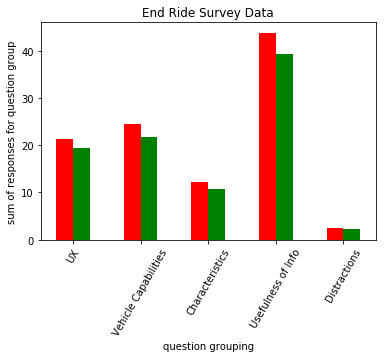

In [6]:
fig, ax = plt.subplots()
julie = (21.2, 24.5, 12.2, 43.8, 2.5)
lily = (19.4, 21.8, 10.7, 39.2, 2.2)
width = 0.25
ind = np.arange(5)
julie_bars = ax.bar(ind, julie, width, color='r')
lily_bars = ax.bar(ind + width, lily, width,color='g')
ax.set_title('End Ride Survey Data')
ax.set_xticks(ind + width/2.0)
ax.set_xticklabels(('UX','Vehicle Capabilities', 'Characteristics','Usefulness of Info', 'Distractions'))
plt.xticks(rotation=60)
plt.ylabel('sum of responses for question group')
plt.xlabel('question grouping')
plt.show()

In [7]:
# user experience
user_exp = df[df.columns[:6]]
user_exp2 = df2[df2.columns[:6]]

In [46]:
list(df2)

['System',
 'On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]',
 'On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]',
 'On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]',
 'On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]',
 'On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]',
 "On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]",
 "On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]",
 "On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]",
 'Please rate each aspect of you

In [128]:
df2[df2.columns[15]]

0                   Indifferent, Proactive, Trustworthy
1               Cold, Indifferent, Passive, Trustworthy
2                       Helpful, Proactive, Trustworthy
3                         Helpful, Informative, Passive
4                         Comforting, Friendly, Helpful
5                                             Proactive
6                        Friendly, Helpful, Informative
7                            Cold, Indifferent, Passive
8     Comforting, Friendly, Helpful, Informative, Ki...
9                                               Helpful
10                              Friendly, Helpful, Kind
11              Helpful, Informative, Kind, Trustworthy
12       Annoying, Cold, Friendly, Indifferent, Passive
13    Cold, Helpful, Indifferent, Passive, Proactive...
14                                 Indifferent, Passive
15                           Cold, Indifferent, Passive
16    Friendly, Helpful, Informative, Proactive, Tru...
17    Comforting, Friendly, Informative, Kind, T

In [129]:
temp15 = df2.drop(df2.columns[16:],axis=1)
temp15 = temp15.drop(temp15.columns[1:15],axis=1)
#temp
words = []
words2 = []
for index,row in temp15.iterrows():
    words.extend(row[1].split(','))
temp16 = df2.drop(df2.columns[17:],axis=1)
temp16 = temp16.drop(temp16.columns[1:16],axis=1)
temp16
for index,row in temp16.iterrows():
    if isinstance(row[1],str):
        if ',' in row[1]:
            words2.extend(row[1].split(','))
        else:
            words2.extend(row[1].split(' '))
    #words.extend(row[1].split(','))
words = [word.strip().lower() for word in words]
words = ' '.join(words)
words
words2 = [word.strip().lower() for word in words2]
words2 = ' '.join(words2)
words2

'robotic personable curious  calm efficient convenient bumbling determined confident ability to handle construction activity indecisive intimidating ground-breaking efficient "green" helpful interesting'

{'helpful': 1.0, 'trustworthy': 0.75, 'friendly': 0.75, 'indifferent': 0.6666666666666666, 'proactive': 0.6666666666666666, 'passive': 0.6666666666666666, 'informative': 0.6666666666666666, 'cold': 0.5, 'kind': 0.4166666666666667, 'comforting': 0.3333333333333333, 'annoying': 0.08333333333333333}


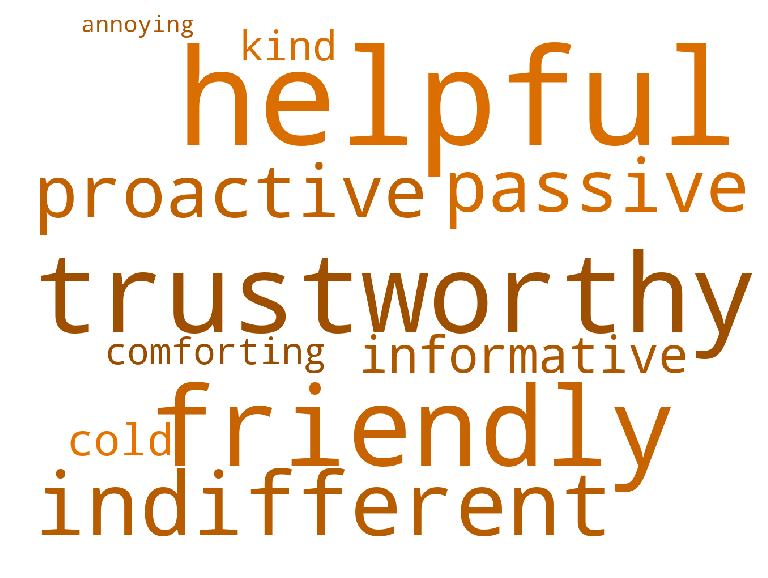

In [130]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = 30
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
wordcloud = WordCloud(collocations=False,max_words=25,background_color = 'white',width = 1280,height = 960,color_func = random_color_func).generate(words)
print(wordcloud.words_)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud.png')

{'efficient': 1.0, 'robotic': 0.5, 'personable': 0.5, 'curious': 0.5, 'calm': 0.5, 'convenient': 0.5, 'bumbling': 0.5, 'determined': 0.5, 'confident': 0.5, 'ability': 0.5, 'handle': 0.5, 'construction': 0.5, 'activity': 0.5, 'indecisive': 0.5, 'intimidating': 0.5, 'ground': 0.5, 'breaking': 0.5, 'green': 0.5, 'helpful': 0.5, 'interesting': 0.5}


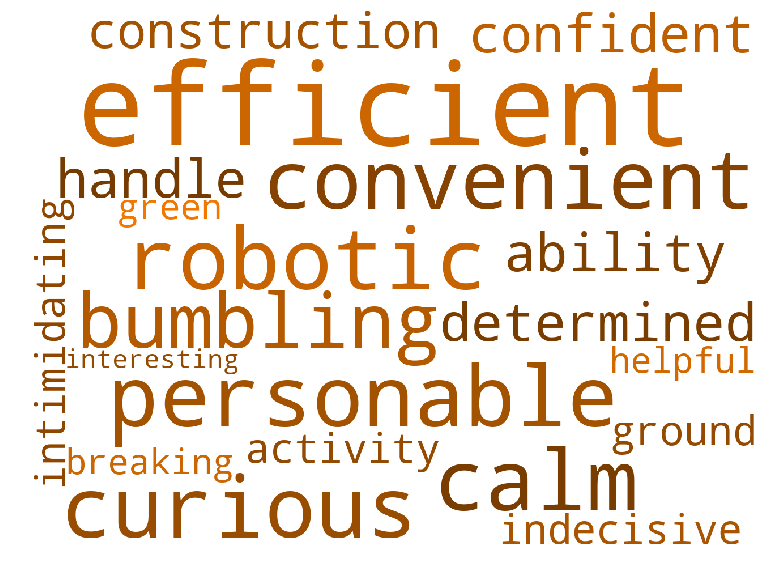

In [131]:
wordcloud2 = WordCloud(collocations=False,max_words=25,background_color = 'white',width = 1280,height = 960,color_func = random_color_func).generate(words2)
print(wordcloud2.words_)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.savefig('wordcloud2.png')

In [8]:
all_system = df2.groupby(['System'])
all_system.var()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                            0.622222                                                                          
Lily                                             0.963636                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                            0.455556                                                               
Lily                                             0.490909                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                            0.844444                                                                
Lily                                             0.854545                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                            0.766667                                                                       
Lily                                             0.672727                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                            0.488889                                                               
Lily                                             0.472727                                                               

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                            0.233333                                                                 
Lily                                             0.290909                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                            0.400000                                                                        
Lily                                             0.563636                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                            0.666667                                                                             
Lily                                             0.618182                           

In [9]:
abs(all_system.var().diff())

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                                 NaN                                                                          
Lily                                             0.341414                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                                 NaN                                                               
Lily                                             0.035354                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                                 NaN                                                                
Lily                                             0.010101                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                                 NaN                                                                       
Lily                                             0.093939                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                                 NaN                                                               
Lily                                             0.016162                                                               

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                                 NaN                                                                 
Lily                                             0.057576                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                                 NaN                                                                        
Lily                                             0.163636                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                 NaN                                                                             
Lily                                             0.048485                           

In [10]:
df2.var()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]                                                                                          0.800000
On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]                                                                                                     0.490476
On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]                                                                                                    0.890476
On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]                                                                                             0.733333
On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]               

In [11]:
user_exp['Total'] = user_exp.sum(axis=1)
user_exp2['Total'] = user_exp2.sum(axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
user_exp_group_by_system = user_exp.groupby(['System'])
user_exp_group_by_system.sum()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                                  46                                                                          
Lily                                                   45                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                                  51                                                               
Lily                                                   47                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                                  50                                                                
Lily                                                   44                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                                  46                                                                       
Lily                                                   40                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                                  51                                                               
Lily                                                   54                                                               

        Total  
System         
Julie     244  
Lily      230

In [13]:
user_exp_group_by_system2 = user_exp2.groupby(['System'])
user_exp_group_by_system2.mean()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                            4.200000                                                                          
Lily                                             3.818182                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                            4.300000                                                               
Lily                                             3.909091                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                            4.200000                                                                
Lily                                             3.636364                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                            3.900000                                                                       
Lily                                             3.454545                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                            4.600000                                                               
Lily                                             4.545455                                                               

            Total  
System             
Julie   21.200000  
Lily    19.363636

In [14]:
user_exp_group_by_system2.var()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                            0.622222                                                                          
Lily                                             0.963636                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                            0.455556                                                               
Lily                                             0.490909                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                            0.844444                                                                
Lily                                             0.854545                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                            0.766667                                                                       
Lily                                             0.672727                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                            0.488889                                                               
Lily                                             0.472727                                                               

            Total  
System             
Julie   11.511111  
Lily    10.254545

In [15]:
user_exp_group_by_system.mean()

On a scale from 1-5, how would you rate your overall user experience in terms of: [Comfort & relaxation during the ride]  \
System                                                                                                                             
Julie                                            3.833333                                                                          
Lily                                             3.750000                                                                          

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived personal safety]  \
System                                                                                                                  
Julie                                            4.250000                                                               
Lily                                             3.916667                                                               

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Perceived safety of others]  \
System                                                                                                                   
Julie                                            4.166667                                                                
Lily                                             3.666667                                                                

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Degree of vehicle trustworthiness]  \
System                                                                                                                          
Julie                                            3.833333                                                                       
Lily                                             3.333333                                                                       

        On a scale from 1-5, how would you rate your overall user experience in terms of: [Willingness to ride again]  \
System                                                                                                                  
Julie                                                4.25                                                               
Lily                                                 4.50                                                               

            Total  
System             
Julie   20.333333  
Lily    19.166667

In [16]:
"""
df2 = pd.read_csv("/Users/kalicornn/Desktop/endride_data_2.csv")
df = df[df.columns[2:]]
df2 = df2[df2.columns[2:]]
columns = ['System','Comfort','Safety','Others Safety', 'Trustworthiness', 'Riding again']
user_exp2 = df2[df2.columns[:6]]
user_exp2.columns = columns
temp = user_exp2.groupby(['System']).mean()
temp.plot(kind='bar')
plt.ylim(0,5)
"""

'\ndf2 = pd.read_csv("/Users/kalicornn/Desktop/endride_data_2.csv")\ndf = df[df.columns[2:]]\ndf2 = df2[df2.columns[2:]]\ncolumns = [\'System\',\'Comfort\',\'Safety\',\'Others Safety\', \'Trustworthiness\', \'Riding again\']\nuser_exp2 = df2[df2.columns[:6]]\nuser_exp2.columns = columns\ntemp = user_exp2.groupby([\'System\']).mean()\ntemp.plot(kind=\'bar\')\nplt.ylim(0,5)\n'

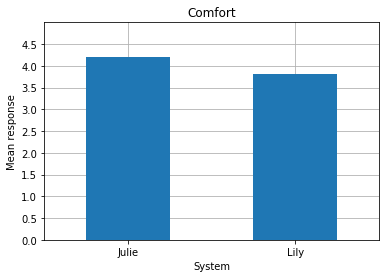

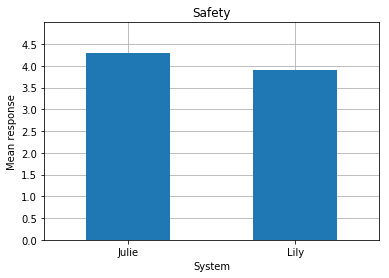

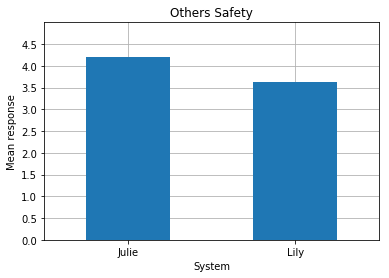

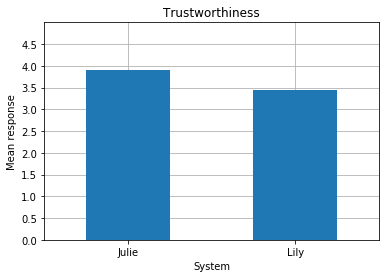

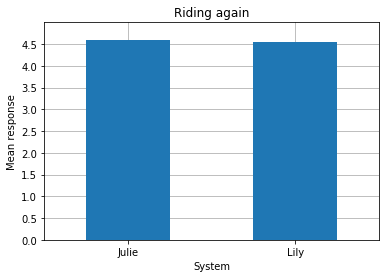

In [17]:
#print(user_exp2.columns)
columns = ['System','Comfort','Safety','Others Safety', 'Trustworthiness', 'Riding again','Total']
user_exp2.columns = columns
for i in range(0,len(user_exp2.columns)-2):
    temp  =user_exp2.groupby(['System']).mean()
    #print(temp)
    curr = temp[temp.columns[[i]]]
    ax = curr.plot(kind='bar',legend=False, zorder=3)
    ax.grid(zorder=0)
    plt.xticks(rotation=0)
    plt.title(list(temp)[i])
    plt.ylim(0,5)
    plt.yticks(np.arange(0, 5, .5))
    plt.ylabel('Mean response')

In [18]:
# confidence in vehicle capability
vehicle_cap = df[df.columns[:12]]
vehicle_cap = vehicle_cap.drop(vehicle_cap.columns[1:6],axis=1)
vehicle_cap_group_by_system = vehicle_cap.groupby(['System'])
vehicle_cap_group_by_system.sum()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                                  54                                                                 
Lily                                                   46                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                                  49                                                                        
Lily                                                   46                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                  45                                                                             
Lily                                                   39                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                                  45                                                                                                        
Lily                                                   46                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                                  41                                                                                                 
Lily                                                   43                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  
System                                                                                                                                              
Julie                                                  42                                                                                           
Lily                                                   40

In [19]:
vehicle_cap2 = df2[df2.columns[:12]]
vehicle_cap2 = vehicle_cap2.drop(vehicle_cap2.columns[1:6],axis=1)
vehicle_cap_group_by_system2 = vehicle_cap2.groupby(['System'])
vehicle_cap_group_by_system2.sum()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                                  47                                                                 
Lily                                                   43                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                                  42                                                                        
Lily                                                   42                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                  40                                                                             
Lily                                                   36                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                                  41                                                                                                        
Lily                                                   42                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                                  37                                                                                                 
Lily                                                   41                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  
System                                                                                                                                              
Julie                                                  38                                                                                           
Lily                                                   36

In [20]:
vehicle_cap['Total'] = vehicle_cap.sum(axis=1)
vehicle_cap2['Total'] = vehicle_cap2.sum(axis=1)

In [21]:
vehicle_cap_group_by_system = vehicle_cap.groupby(['System'])
vehicle_cap_group_by_system.sum()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                                  54                                                                 
Lily                                                   46                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                                  49                                                                        
Lily                                                   46                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                  45                                                                             
Lily                                                   39                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                                  45                                                                                                        
Lily                                                   46                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                                  41                                                                                                 
Lily                                                   43                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  \
System                                                                                                                                               
Julie                                                  42                                                                                            
Lily                                                   40                                                                                            

        Total  
System         
Julie     276  
Lily      260

In [22]:
vehicle_cap_group_by_system2 = vehicle_cap2.groupby(['System'])
vehicle_cap_group_by_system2.sum()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                                  47                                                                 
Lily                                                   43                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                                  42                                                                        
Lily                                                   42                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                  40                                                                             
Lily                                                   36                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                                  41                                                                                                        
Lily                                                   42                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                                  37                                                                                                 
Lily                                                   41                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  \
System                                                                                                                                               
Julie                                                  38                                                                                            
Lily                                                   36                                                                                            

        Total  
System         
Julie     245  
Lily      240

In [23]:
vehicle_cap_group_by_system.mean()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                            4.500000                                                                 
Lily                                             3.833333                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                            4.083333                                                                        
Lily                                             3.833333                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                                3.75                                                                             
Lily                                                 3.25                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                            3.750000                                                                                                        
Lily                                             3.833333                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                            3.416667                                                                                                 
Lily                                             3.583333                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  \
System                                                                                                                                               
Julie                                            3.500000                                                                                            
Lily                                             3.333333                                                                                            

            Total  
System             
Julie   23.000000  
Lily    21.666667

In [24]:
vehicle_cap_group_by_system2.mean()

On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [AV control ]  \
System                                                                                                                    
Julie                                            4.700000                                                                 
Lily                                             3.909091                                                                 

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Driving capability]  \
System                                                                                                                           
Julie                                            4.200000                                                                        
Lily                                             3.818182                                                                        

        On a scale from 1-5, how would you rate your confidence in the vehicle's capability, in terms of: [Decision-making ability]  \
System                                                                                                                                
Julie                                            4.000000                                                                             
Lily                                             3.272727                                                                             

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interaction with the Digital assistant]  \
System                                                                                                                                                           
Julie                                            4.100000                                                                                                        
Lily                                             3.818182                                                                                                        

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [Interior vehicle accomodations ]  \
System                                                                                                                                                    
Julie                                            3.700000                                                                                                 
Lily                                             3.727273                                                                                                 

        Please rate each aspect of your autonomous vehicle ride experience on a scale from 1-5 (5 being the highest): [The drive / driving route ]  \
System                                                                                                                                               
Julie                                            3.800000                                                                                            
Lily                                             3.272727                                                                                            

            Total  
System             
Julie   24.500000  
Lily    21.818182

In [25]:
# perceived AV anthropomorphic characteristics
chrs = df[df.columns[:15]]
chrs = chrs.drop(chrs.columns[1:-3],axis=1)
#chrs.columns
chrs2 = df2[df2.columns[:15]]
chrs2 = chrs2.drop(chrs2.columns[1:-3],axis=1)

In [26]:
chrs['Total'] = chrs.sum(axis=1)
chrs2['Total'] = chrs2.sum(axis=1)
chrs_group_by_system = chrs.groupby(['System'])
chrs_group_by_system.sum()

On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]  \
System                                                                                                                                        
Julie                                                  46                                                                                     
Lily                                                   41                                                                                     

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]  \
System                                                                                                                                     
Julie                                                  46                                                                                  
Lily                                                   45                                                                                  

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]  \
System                                                                                                                                       
Julie                                                  45                                                                                    
Lily                                                   41                                                                                    

        Total  
System         
Julie     137  
Lily      127

In [27]:
chrs_group_by_system2 = chrs2.groupby(['System'])
chrs_group_by_system2.sum()

On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]  \
System                                                                                                                                        
Julie                                                  41                                                                                     
Lily                                                   38                                                                                     

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]  \
System                                                                                                                                     
Julie                                                  40                                                                                  
Lily                                                   42                                                                                  

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]  \
System                                                                                                                                       
Julie                                                  41                                                                                    
Lily                                                   38                                                                                    

        Total  
System         
Julie     122  
Lily      118

In [28]:
chrs_group_by_system.mean()

On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]  \
System                                                                                                                                        
Julie                                            3.833333                                                                                     
Lily                                             3.416667                                                                                     

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]  \
System                                                                                                                                     
Julie                                            3.833333                                                                                  
Lily                                             3.750000                                                                                  

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]  \
System                                                                                                                                       
Julie                                            3.750000                                                                                    
Lily                                             3.416667                                                                                    

            Total  
System             
Julie   11.416667  
Lily    10.583333

In [29]:
chrs_group_by_system2.mean()

On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Trustworthy]  \
System                                                                                                                                        
Julie                                            4.100000                                                                                     
Lily                                             3.454545                                                                                     

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [Friendly]  \
System                                                                                                                                     
Julie                                            4.000000                                                                                  
Lily                                             3.818182                                                                                  

        On a scale from 1-5, to what degree did the digital assistant make the self-driving vehicle seem to be the following? [In Control]  \
System                                                                                                                                       
Julie                                            4.100000                                                                                    
Lily                                             3.454545                                                                                    

            Total  
System             
Julie   12.200000  
Lily    10.727273

In [30]:
# value/usefulness of information provided 
#infovalue = df[df.columns[:-10]]
#infovalue = infovalue.drop(infovalue.columns[1:-6],axis=1)
infovalue = df[df.columns[:-21]]
infovalue = infovalue.drop(infovalue.columns[1:-11],axis=1)
#infovalue.columns
infovalue2 = df2[df2.columns[:-21]]
infovalue2 = infovalue2.drop(infovalue2.columns[1:-11],axis=1)

In [31]:
infovalue = infovalue.replace({'N/A':0})
infovalue['Total'] = infovalue.sum(axis=1)
infovalue2 = infovalue2.replace({'N/A':0})
infovalue2['Total'] = infovalue2.sum(axis=1)

In [32]:
infovalue_group_by_system = infovalue.groupby(['System'])
infovalue_group_by_system.sum()

On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [GPS navigation with current location]  \
System                                                                                                                                                                                              
Julie                                                  56                                                                                                                                           
Lily                                                   57                                                                                                                                           

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Route map]  \
System                                                                                                                                                                   
Julie                                                  57                                                                                                                
Lily                                                   56                                                                                                                

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Estimated Time of Arrival (ETA)]  \
System                                                                                                                                                                                         
Julie                                                  54                                                                                                                                      
Lily                                                   56                                                                                                                                      

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Stop button]  \
System                                                                                                                                                                     
Julie                                                47.0                                                                                                                  
Lily                                                 51.0                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Speedometer]  \
System                                                                                                                                                                     
Julie                                                53.0                                                                                                                  
Lily                                                 49.0                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Being asked how you feel throughout the ride]  \
System                                                                                                                                                                                    

In [33]:
infovalue_group_by_system2 = infovalue2.groupby(['System'])
infovalue_group_by_system2.sum()

On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [GPS navigation with current location]  \
System                                                                                                                                                                                              
Julie                                                  46                                                                                                                                           
Lily                                                   52                                                                                                                                           

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Route map]  \
System                                                                                                                                                                   
Julie                                                  47                                                                                                                
Lily                                                   51                                                                                                                

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Estimated Time of Arrival (ETA)]  \
System                                                                                                                                                                                         
Julie                                                  44                                                                                                                                      
Lily                                                   51                                                                                                                                      

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Stop button]  \
System                                                                                                                                                                     
Julie                                                37.0                                                                                                                  
Lily                                                 46.0                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Speedometer]  \
System                                                                                                                                                                     
Julie                                                43.0                                                                                                                  
Lily                                                 44.0                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Being asked how you feel throughout the ride]  \
System                                                                                                                                                                                    

In [34]:
infovalue_group_by_system.mean()

On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [GPS navigation with current location]  \
System                                                                                                                                                                                              
Julie                                            4.666667                                                                                                                                           
Lily                                             4.750000                                                                                                                                           

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Route map]  \
System                                                                                                                                                                   
Julie                                            4.750000                                                                                                                
Lily                                             4.666667                                                                                                                

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Estimated Time of Arrival (ETA)]  \
System                                                                                                                                                                                         
Julie                                            4.500000                                                                                                                                      
Lily                                             4.666667                                                                                                                                      

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Stop button]  \
System                                                                                                                                                                     
Julie                                                4.70                                                                                                                  
Lily                                                 4.25                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Speedometer]  \
System                                                                                                                                                                     
Julie                                            4.416667                                                                                                                  
Lily                                             4.454545                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Being asked how you feel throughout the ride]  \
System                                                                                                                                                                                    

In [35]:
infovalue_group_by_system2.mean()

On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [GPS navigation with current location]  \
System                                                                                                                                                                                              
Julie                                            4.600000                                                                                                                                           
Lily                                             4.727273                                                                                                                                           

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Route map]  \
System                                                                                                                                                                   
Julie                                            4.700000                                                                                                                
Lily                                             4.636364                                                                                                                

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Estimated Time of Arrival (ETA)]  \
System                                                                                                                                                                                         
Julie                                            4.400000                                                                                                                                      
Lily                                             4.636364                                                                                                                                      

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Stop button]  \
System                                                                                                                                                                     
Julie                                            4.625000                                                                                                                  
Lily                                             4.181818                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Speedometer]  \
System                                                                                                                                                                     
Julie                                                 4.3                                                                                                                  
Lily                                                  4.4                                                                                                                  

        On a scale from 1-5, please rate your preference for the following specific features (5 being the highest). If not applicable, please select N/A.  [Being asked how you feel throughout the ride]  \
System                                                                                                                                                                                    

In [36]:
# distraction from the awareness of being in an AV.
distraction = df[df.columns[:-2]]
distraction = distraction.drop(distraction.columns[1:-5],axis=1)
#distraction.columns
distraction2 = df2[df2.columns[:-2]]
distraction2 = distraction2.drop(distraction2.columns[1:-5],axis=1)

In [37]:
distraction = distraction.replace({'Yes':1,'No':0})
distraction['Total'] = distraction.sum(axis=1)
distraction2 = distraction2.replace({'Yes':1,'No':0})
distraction2['Total'] = distraction2.sum(axis=1)

In [38]:
distraction_group_by_system = distraction.groupby(['System'])
distraction_group_by_system.sum()

Please indicate if following attributes affected your riding experience:  [Bumpiness]  \
System                                                                                          
Julie                                                   8                                       
Lily                                                    6                                       

        Please indicate if following attributes affected your riding experience:  [Trip length]  \
System                                                                                            
Julie                                                   2                                         
Lily                                                    1                                         

        Please indicate if following attributes affected your riding experience:  [Swirviness (side to side motion)]  \
System                                                                                                                 
Julie                                                   3                                                              
Lily                                                    0                                                              

        Please indicate if following attributes affected your riding experience:  [Roundabouts]  \
System                                                                                            
Julie                                                  11                                         
Lily                                                   11                                         

        Please indicate if following attributes affected your riding experience:  [Sudden stops]  \
System                                                                                             
Julie                                                   9                                          
Lily                                                    9                                          

        Total  
System         
Julie      33  
Lily       27

In [39]:
distraction_group_by_system2 = distraction2.groupby(['System'])
distraction_group_by_system2.sum()

Please indicate if following attributes affected your riding experience:  [Bumpiness]  \
System                                                                                          
Julie                                                   6                                       
Lily                                                    5                                       

        Please indicate if following attributes affected your riding experience:  [Trip length]  \
System                                                                                            
Julie                                                   2                                         
Lily                                                    1                                         

        Please indicate if following attributes affected your riding experience:  [Swirviness (side to side motion)]  \
System                                                                                                                 
Julie                                                   1                                                              
Lily                                                    0                                                              

        Please indicate if following attributes affected your riding experience:  [Roundabouts]  \
System                                                                                            
Julie                                                   9                                         
Lily                                                   10                                         

        Please indicate if following attributes affected your riding experience:  [Sudden stops]  \
System                                                                                             
Julie                                                   7                                          
Lily                                                    8                                          

        Total  
System         
Julie      25  
Lily       24

In [40]:
distraction_group_by_system.mean()

Please indicate if following attributes affected your riding experience:  [Bumpiness]  \
System                                                                                          
Julie                                            0.666667                                       
Lily                                             0.500000                                       

        Please indicate if following attributes affected your riding experience:  [Trip length]  \
System                                                                                            
Julie                                            0.166667                                         
Lily                                             0.083333                                         

        Please indicate if following attributes affected your riding experience:  [Swirviness (side to side motion)]  \
System                                                                                                                 
Julie                                                0.25                                                              
Lily                                                 0.00                                                              

        Please indicate if following attributes affected your riding experience:  [Roundabouts]  \
System                                                                                            
Julie                                            0.916667                                         
Lily                                             0.916667                                         

        Please indicate if following attributes affected your riding experience:  [Sudden stops]  \
System                                                                                             
Julie                                                0.75                                          
Lily                                                 0.75                                          

        Total  
System         
Julie    2.75  
Lily     2.25

In [41]:
distraction_group_by_system2.mean()

Please indicate if following attributes affected your riding experience:  [Bumpiness]  \
System                                                                                          
Julie                                            0.600000                                       
Lily                                             0.454545                                       

        Please indicate if following attributes affected your riding experience:  [Trip length]  \
System                                                                                            
Julie                                            0.200000                                         
Lily                                             0.090909                                         

        Please indicate if following attributes affected your riding experience:  [Swirviness (side to side motion)]  \
System                                                                                                                 
Julie                                                 0.1                                                              
Lily                                                  0.0                                                              

        Please indicate if following attributes affected your riding experience:  [Roundabouts]  \
System                                                                                            
Julie                                            0.900000                                         
Lily                                             0.909091                                         

        Please indicate if following attributes affected your riding experience:  [Sudden stops]  \
System                                                                                             
Julie                                            0.700000                                          
Lily                                             0.727273                                          

           Total  
System            
Julie   2.500000  
Lily    2.181818